# `astropy.ndarray`

In [1]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1D array - spectra

## 2D array - image

## 3D array - cube

SDSS-MaNGA is an IFS survey of galaxies.

Example data:
![manga_panels](https://www.sdss4.org/wp-content/uploads/2021/05/manga_panels.png)

In [2]:
# load MaNGA data
from astropy.io import fits
hl = fits.open("../../../examples/astronomical_data_cube/manga-7443-12701-LOGCUBE.fits.gz")
hl.info()

Filename: ../../../examples/astronomical_data_cube/manga-7443-12701-LOGCUBE.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      75   ()      
  1  FLUX          1 ImageHDU       100   (72, 72, 4563)   float32   
  2  IVAR          1 ImageHDU        17   (72, 72, 4563)   float32   
  3  MASK          1 ImageHDU        17   (72, 72, 4563)   int32   
  4  LSFPOST       1 ImageHDU        11   (72, 72, 4563)   float32   
  5  LSFPRE        1 ImageHDU        11   (72, 72, 4563)   float32   
  6  WAVE          1 ImageHDU         9   (4563,)   float64   
  7  SPECRES       1 ImageHDU         9   (4563,)   float64   
  8  SPECRESD      1 ImageHDU         9   (4563,)   float64   
  9  PRESPECRES    1 ImageHDU         9   (4563,)   float64   
 10  PRESPECRESD    1 ImageHDU         9   (4563,)   float64   
 11  OBSINFO       1 BinTableHDU    148   15R x 65C   [25A, 17A, 5A, J, I, 9A, E, E, E, E, E, E, J, J, I, J, E, 12A, J, 8A, E, E, E, E, E, 

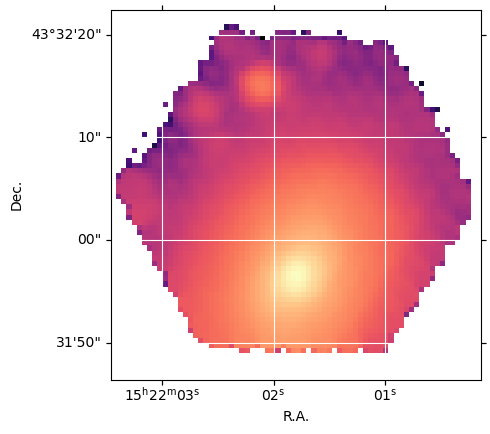

In [3]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
wcs = WCS(hl["FLUX"].header)
flux_sum = hl["FLUX"].data.sum(axis=0)

plt.figure()
plt.subplot(projection=wcs.dropaxis(2))
plt.imshow(np.log10(flux_sum), cmap=plt.cm.magma)
plt.grid(color='white', ls='solid')
plt.xlabel('R.A.')
plt.ylabel('Dec.')